Installing Dependencies

In [1]:
#install necessary dependencies
!pip install keras matplotlib seaborn tensorflow scikit-learn

Importing Libraries

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Create synthetic data

In [4]:
#Step-1 Create synthetic data
np.random.seed(42)
latency = np.random.uniform(1,100,1000)
throughput = np.random.uniform(10,1000,1000)
signal_strength = np.random.uniform(-120,-40,1000)
user_density = np.random.uniform(10,1000,1000)
bandwidth = np.random.uniform(5,100,1000)
packet_loss_rate = np.random.uniform(0,5,1000)
device_type = np.random.choice(['Smartphone','IoT','AR/VR'],size=1000)

network_slice = []
for i in range(1000):
  if latency[i]<10 and throughput[i]>500:
    network_slice.append("eMBB")
  elif latency[i]>50 and user_density[i]>500:
    network_slice.append("URLLC")
  else:
    network_slice.append("mMTC")

df = pd.DataFrame({
    'Latency (ms)' : latency,
    'Throughput (Mbps)': throughput,
    'Signal Strength (dBm)': signal_strength,
    'User Density (user/km²)': user_density,
    'Available Bandwidth (MHz)': bandwidth,
    'Packet Loss Rate (%)': packet_loss_rate,
    'Device Type': device_type,
    'Network Slice': network_slice
})
df['Device Type'] = LabelEncoder().fit_transform(df['Device Type'])

Step 2: Preprocess Data

In [5]:
# Step 2: Preprocess data
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
scaler = StandardScaler()
X[:,:-1]= scaler.fit_transform(X[:,:-1])
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
dummy_y = to_categorical(encoded_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42)


Step 3: Define and Train CNN Model

In [6]:
#Step 3: CNN-based model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Dropout(0.3),
    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

history = model.fit(X_train_cnn, Y_train, validation_split=0.2, epochs=20, batch_size=128)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.3397 - loss: 1.0957 - val_accuracy: 0.7429 - val_loss: 0.9275
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7064 - loss: 0.8906 - val_accuracy: 0.7429 - val_loss: 0.7479
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7116 - loss: 0.7791 - val_accuracy: 0.7429 - val_loss: 0.6234
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7244 - loss: 0.6458 - val_accuracy: 0.7429 - val_loss: 0.5454
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7247 - loss: 0.6417 - val_accuracy: 0.8571 - val_loss: 0.4997
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7754 - loss: 0.5757 - val_accuracy: 0.8643 - val_loss: 0.4584
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8236 - loss: 0.5208 - val_accuracy: 0.8929 - val_loss: 0.4120
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8154 - loss: 0.5072 - val_accuracy: 0.8643 - val_loss: 0.3815


Step 4: Evaluate the Model

In [7]:
#Step 4: Evaluate the model
scores = model.evaluate(X_test_cnn, Y_test)
print("\n Accuracy: %.2f%%" % (scores[1]*100))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8940 - loss: 0.2176 

 Accuracy: 91.33%


Step 5: Visualize Training and Validation Metrics

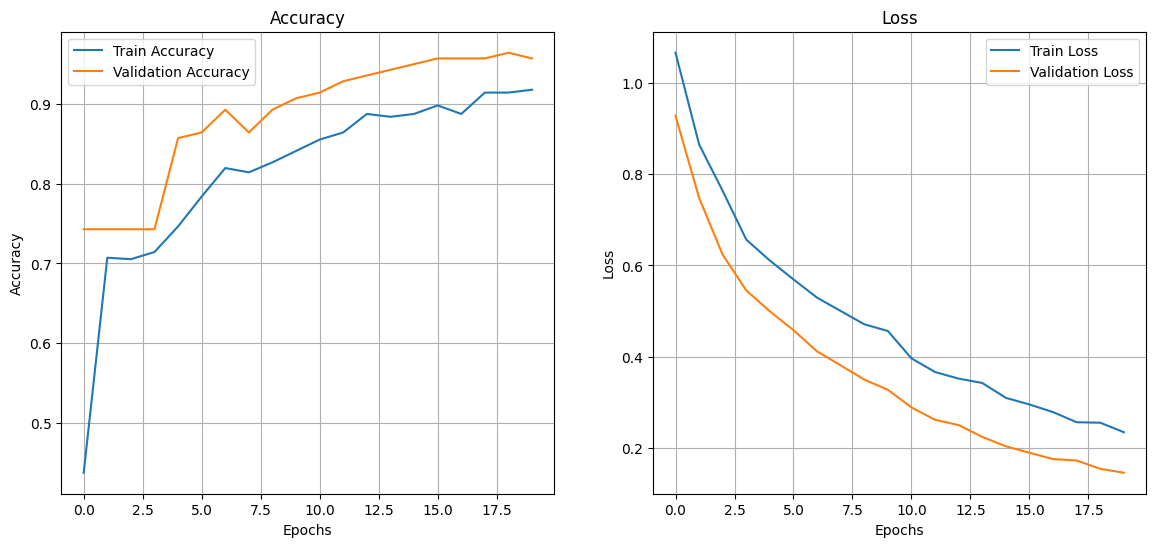

In [8]:
# Plot Accuracy and Loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Step 6: Generate Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


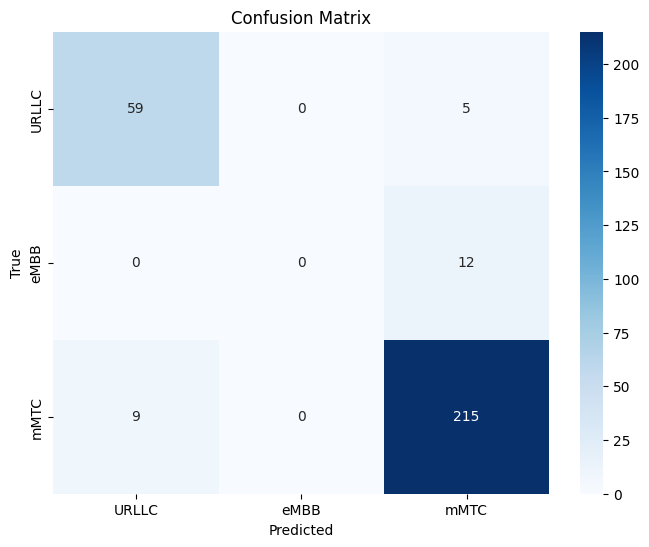

In [9]:
# Confusion Matrix
Y_pred = model.predict(X_test_cnn)
Y_pred_class = np.argmax(Y_pred, axis=1)
Y_test_class = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test_class, Y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Step 7: Generate Classification Report

In [10]:
# Classification report
print("\nClassification Report:")
print(classification_report(Y_test_class, Y_pred_class, target_names=encoder.classes_))



Classification Report:
              precision    recall  f1-score   support

       URLLC       0.87      0.92      0.89        64
        eMBB       0.00      0.00      0.00        12
        mMTC       0.93      0.96      0.94       224

    accuracy                           0.91       300
   macro avg       0.60      0.63      0.61       300
weighted avg       0.88      0.91      0.89       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 8: Plot ROC Curve

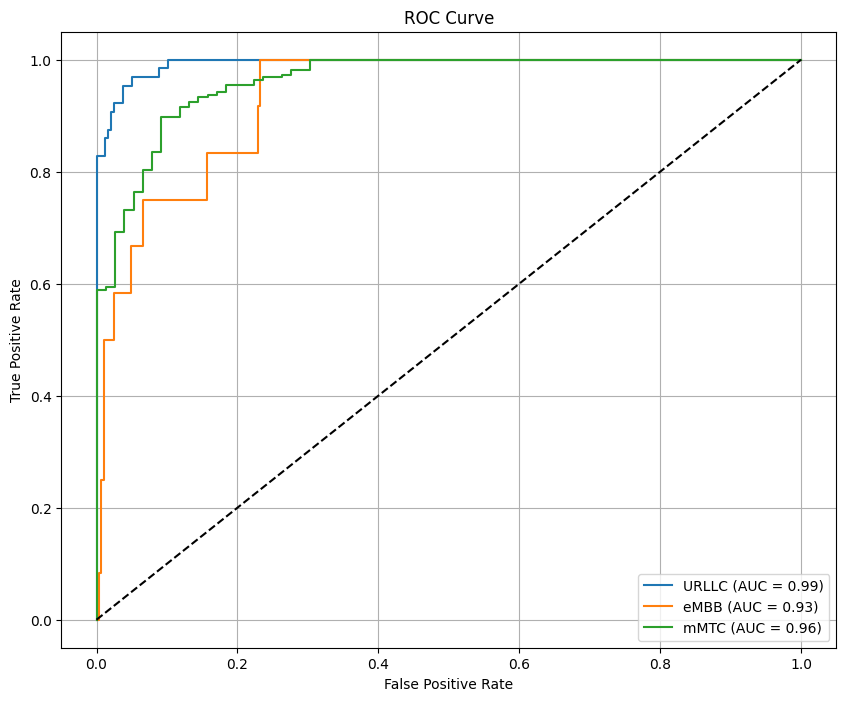

In [11]:
#ROC Curve
plt.figure(figsize=(10, 8))
for i in range(3):
    fpr, tpr, _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{encoder.classes_[i]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

Step 9: Plot pairwise Feature interactions

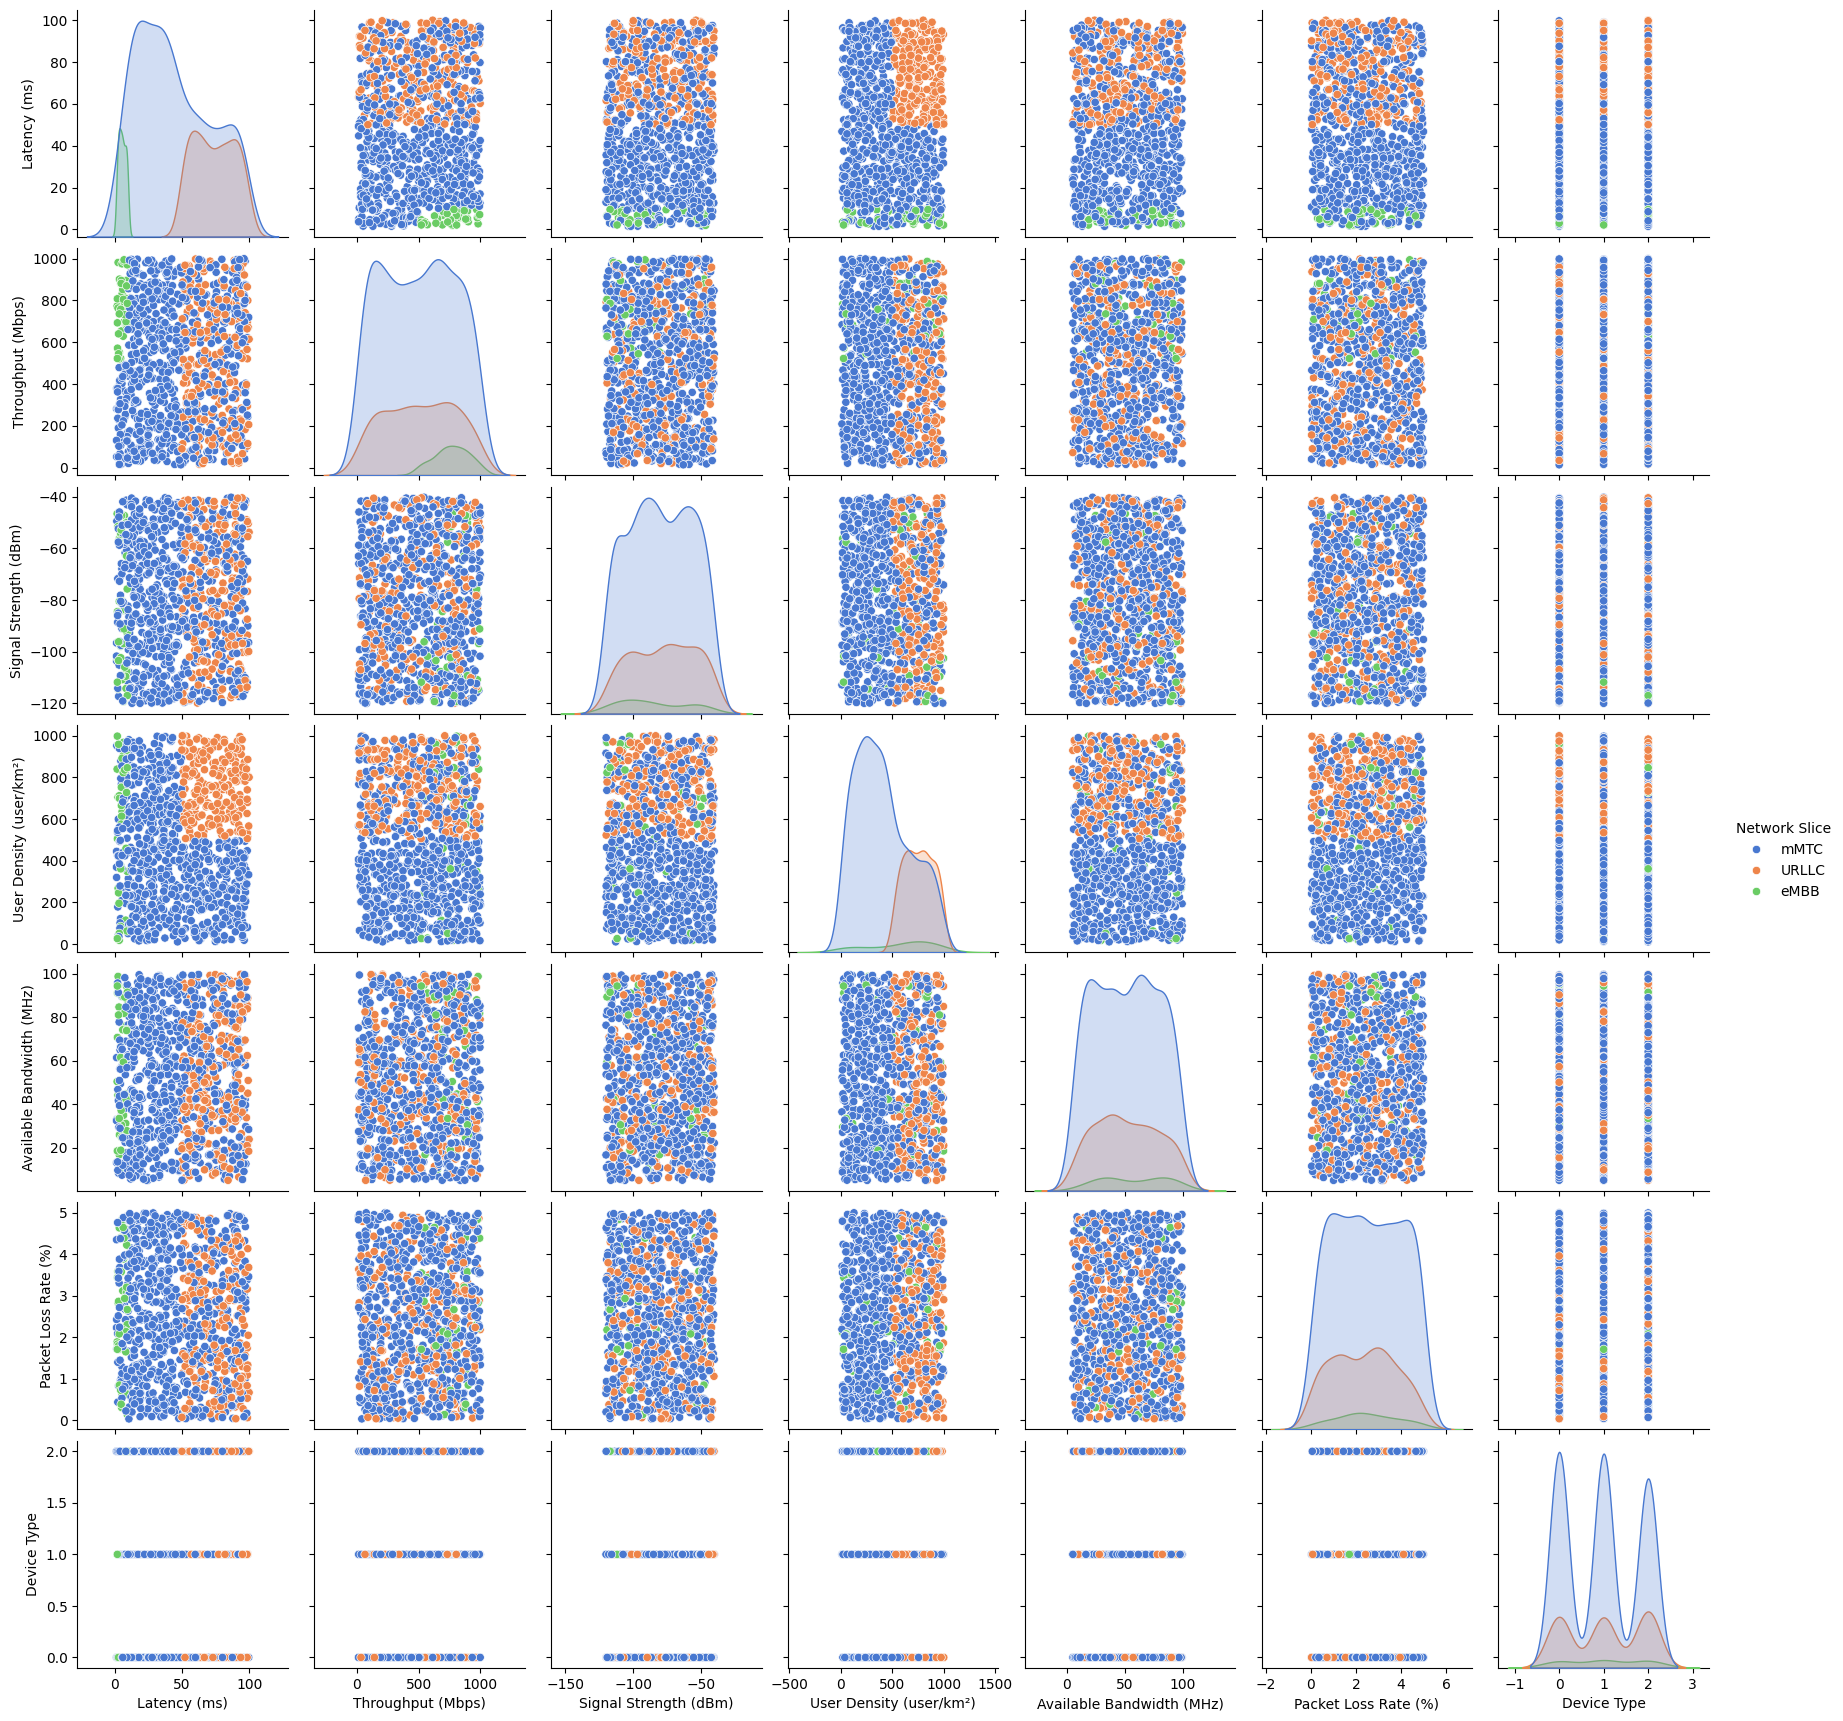

In [12]:
# Pair Plot with KDE
sns.pairplot(df, hue='Network Slice', palette='muted', diag_kind='kde')
plt.show()

Step 10: Stimulated Resource Utilization Heatmap

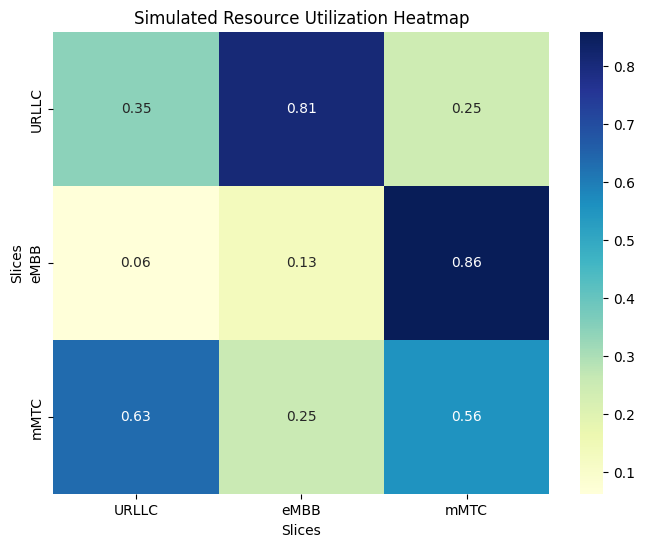

In [13]:
# Simulated Resource Utilization Heatmap
slice_load = np.random.uniform(0, 1, (3, 3))  # Simulated utilization for eMBB, mMTC, URLLC
plt.figure(figsize=(8, 6))
sns.heatmap(slice_load, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Simulated Resource Utilization Heatmap")
plt.xlabel("Slices")
plt.ylabel("Slices")
plt.show()